**Coefficients Based on Accomodations**

In [0]:
import pandas as pd
import numpy as np

import lightgbm as lgbm

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import mean_squared_error, make_scorer

In [3]:
from google.colab import files
full = files.upload()

Saving full_listings.csv to full_listings.csv


In [4]:
df = pd.read_csv('full_listings.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (83,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [59]:
sum(df['square_feet'].isna())

50213

In [0]:
imp_df = df.copy()
imp_df = imp_df[['host_is_superhost', 'neighbourhood', 'accommodates', 'bathrooms', 
                 'bedrooms', 'square_feet', 'room_type', 'property_type', 'number_of_reviews', 'price', 
                 'zipcode', 'latitude', 'longitude']]
# 'amenities', 'bed_type'

In [0]:
imp_df['neighbourhood'], neighbourhood_map = pd.factorize(df['neighbourhood'])
imp_df['property_type'], property_type_map = pd.factorize(df['property_type'])
# imp_df['bed_type'], bed_type_map = pd.factorize(df['bed_type'])
imp_df['room_type'], room_type_map = pd.factorize(df['room_type'])
imp_df['zipcode'], room_type_map = pd.factorize(df['zipcode'])

**Accommodations for 1 or 2 people**

In [35]:
sum(imp_df['accommodates'].isin([2]))

23138

In [36]:
two = imp_df.loc[imp_df['accommodates'].isin([2])]
two.head()

,host_is_superhost,neighbourhood,accommodates,bathrooms,bedrooms,square_feet,room_type,property_type,number_of_reviews,price,zipcode,latitude,longitude
2,0,2,2,1.0,1.0,NaN,0,0,78,200.0,2,40.74767,-73.97500
3,0,3,2,0.0,1.0,NaN,1,0,49,60.0,3,40.68688,-73.95596
4,0,2,2,1.0,1.0,NaN,1,0,454,79.0,4,40.76489,-73.98493
7,1,2,2,1.0,1.0,NaN,1,0,204,85.0,7,40.76076,-73.98867
8,1,6,2,1.5,1.0,NaN,1,2,175,89.0,8,40.66829,-73.98779


In [37]:
X = two.drop(['price', 'accommodates'], axis='columns').values
y = two['price'].values

const_params = {
    'objective':                      'regression', 
    'metric':                         'rmse',
    'n_jobs':                         -1
}

tuning_parameters = {
    'learning_rate':                  [0.11, 0.115, 0.12], 
    'max_depth':                      [20], 
    'n_estimators':                   [275, 280, 285], 
    'random_state':                   [0]
}

def rmse(y_true, y_pred): return abs(np.sqrt(mean_squared_error(y_true, y_pred)))
scorer = make_scorer(rmse, greater_is_better=False)

grid = GridSearchCV(lgbm.LGBMRegressor(**const_params), 
                    tuning_parameters, 
                    cv=StratifiedKFold(5), 
                    scoring=scorer, 
                    n_jobs=-1)

grid.fit(X, y)

print(f'Best parameters {grid.best_params_}.')
print(f'Best RMSE is {-1*grid.best_score_}.')

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters {'learning_rate': 0.11, 'max_depth': 20, 'n_estimators': 275, 'random_state': 0}.
Best RMSE is 359.9212239673881.


In [40]:
imp_df.corr()['price']

host_is_superhost   -0.014312
neighbourhood       -0.026209
accommodates         0.228735
bathrooms            0.150060
bedrooms             0.173747
square_feet          0.401846
room_type           -0.130123
property_type        0.086424
number_of_reviews   -0.041875
price                1.000000
zipcode             -0.050318
latitude             0.029713
longitude           -0.112691
Name: price, dtype: float64

**Correlation Graph**

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

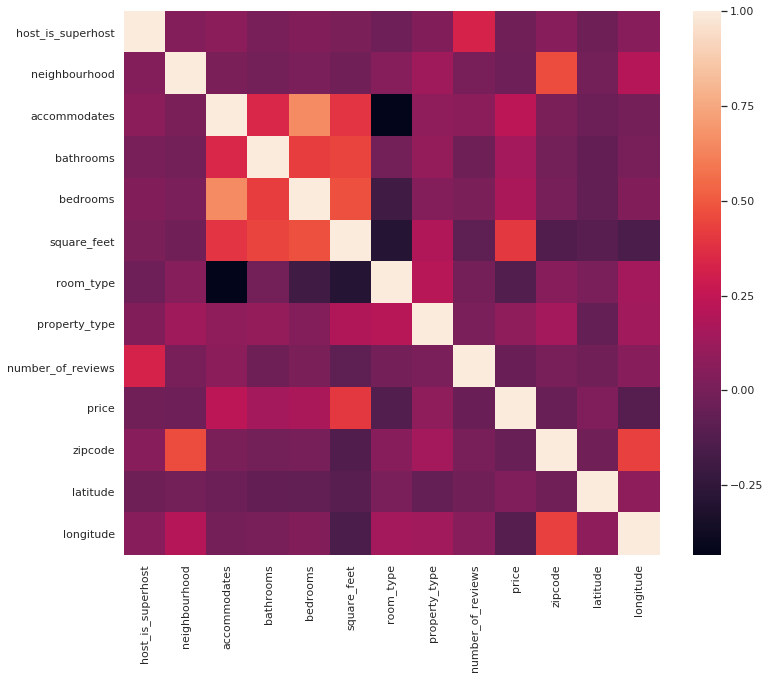

In [55]:
sns.set(rc={'figure.figsize':(12,10)})
ax = sns.heatmap(imp_df.corr())